# TABLE OF CONTENT :


### 1.   Why CNN's ?
### 2.   Convolutional Neural Networks
    2.1  Convolution Layer 
          2.1.1  What are Filters ?
          2.1.2  Edge Detection Filters (exemple edge dection li gal 3lih affif)
          2.1.3  Why Filters ?   
    2.2   Pooling Layer 
    2.3   Fully connected Layer 18
### 3.   Implementing a CNN model(cifar 10)











# Why CNN's ?
Imagine a simple image of hand written digit 28x28 pixels
---
<img src="https://qph.fs.quoracdn.net/main-qimg-17d779fffc5ce42e3c2399a05de2dd70" width="40%" >




Each pixel is an number between 0 and 255,
so when we try to classifay the image we need :

![Texte alternatif…](https://miro.medium.com/max/960/1*av47vApmzuM0AN21VaIcSA.png)

Your nueral network will look like that !!!


<img src="https://drive.google.com/uc?id=1F4_FHCLOg_LiGon6AbY3wIlj4doeUXqE" width="90%"  >





# What does CNN's do about this ?
 What CNN does is, it extract the feature of image and convert it into lower dimension without loosing its characteristics by passing it to different type of layers





 <img src="https://drive.google.com/uc?id=13jsebAiWGODXDuW-yxAEUJUwlXXRhkMd" width="70%" align="right" >
 
---------

*   Convolution Layer
*   Pooling Layer
*   Fully Connected Layer
---------


























#2.1-   Convolution Layer
##2.1.1- Filters :
A colored image is represented with a matrix :


<img src="https://miro.medium.com/max/1073/1*icINeO4H7UKe3NlU1fXqlA.jpeg" width="50%"  >

We can turn to black and white :


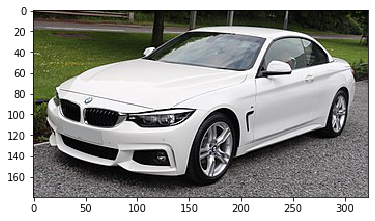

In [0]:

from matplotlib import pyplot as plt
#import matplotlib.image as mpimg
from skimage import io
#image = io.imread(url)
import cv2

%matplotlib inline

# Read in the image
image = io.imread("http://bigdeal.mu/wp-content/uploads/2019/02/324px-2018_BMW_420i_M_Sport_Automatic_2.0_Front.jpg")
plt.imshow(image)
plt.show()

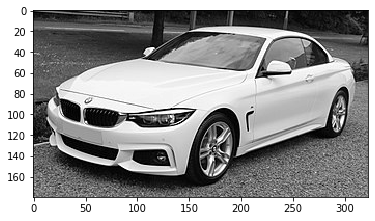

In [0]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')


A filter looks like this :    



<img src="http://www.manifold.net/doc/mfd9/images/convolution_filter01_00.png" width="20%"  >

How to declare it ? simple it is normal matrix :

In [0]:
import numpy as np #importing numpy
#creating a filter 
first_filter= np.array([[1,7,1],
                   [8,4.6,55550],
                   [1,4,2131213123]
                    ])
print(first_filter)

[[1.00000000e+00 7.00000000e+00 1.00000000e+00]
 [8.00000000e+00 4.60000000e+00 5.55500000e+04]
 [1.00000000e+00 4.00000000e+00 2.13121312e+09]]


## How does a filter works ?

<img src="https://drive.google.com/uc?id=1zCoc0re0Kw-otdZOOm1Lyq1Hw2jbQtFn" >

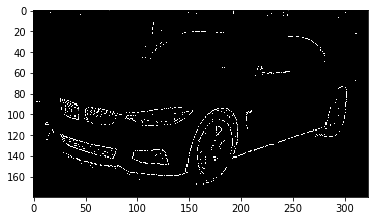

In [0]:
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel) 
filtered_image = cv2.filter2D(gray, -1, first_filter)
# You can use as much filter as you want 
plt.imshow(filtered_image, cmap='gray')

hello


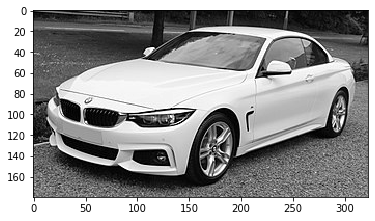

In [0]:
#try this two filters togther
filter_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

filter_x= np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]
                    ])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
#filtered_image = cv2.filter2D(gray, -1, filter_y)

plt.imshow(gray, cmap='gray')
print("hello")
filtered_image = cv2.filter2D(gray, -1, filter_x)


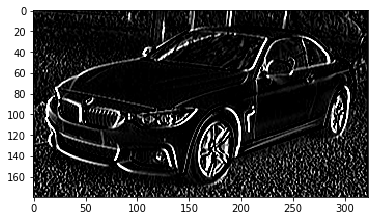

In [0]:
plt.imshow(filtered_image, cmap='gray')


## Padding and Stride :
**Stride** refers to how many steps we are moving in each steps in convolution
<img src="https://miro.medium.com/max/790/1*g0OmDI1w9KqN7Rpw6Qo8Xg@2x.gif" width="50%">


### Why do we need padding ?
<img src="https://miro.medium.com/max/800/1*17TNPi4m0pBqOCGrXzU27w.gif" width="50%">




## Edge detection :
Every image has vertical and horizontal edges which actually combining to form a image. Convolution operation is used with some filters for detecting edges.

We will try to do that 

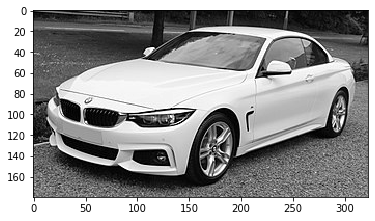

In [0]:
# Read in the image
image = io.imread("http://bigdeal.mu/wp-content/uploads/2019/02/324px-2018_BMW_420i_M_Sport_Automatic_2.0_Front.jpg")
plt.imshow(image)

#
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')


In [0]:
##Feel free to modify the numbers here, to try out another filter!
filter = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter.shape)


Filter shape:  (4, 4)


In [0]:
# Defining four different filters, 
# all of which are linear combinations of the `filter` defined above

# define four filters
filter_1 = filter
filter_2 = filter_1.T
filter_3 = -filter_1
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# For an example, print out the values of filter 1
print('Filter 1: \n', filter_1,'Filter 2: \n', filter_2,'Filter 3: \n', filter_3,'Filter 4: \n', filter_4)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]] Filter 2: 
 [[-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 1  1  1  1]
 [ 1  1  1  1]] Filter 3: 
 [[ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]
 [ 1  1 -1 -1]] Filter 4: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


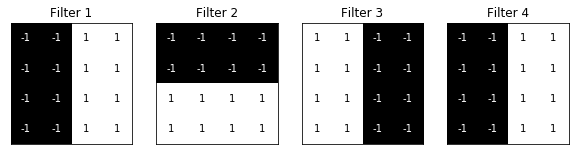

In [0]:
# visualize all four filters 
# gives a great way to see what does the filters do
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

## Defining a convolutional layer

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # defines the convolutional layer, assumes there are 4 grayscale filters
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # returns both layers
        return conv_x, activated_x
    
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


### We want now to visualise the image after it passed into a certain number of layers by defining this function

In [0]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

### Now we visulaise the images after passing by eact filter

tensor([[[[  53.,   45.,   39.,  ...,  -24.,    6.,   -4.],
          [  39.,   40.,   64.,  ...,  -12.,    9.,   -1.],
          [  23.,   -7.,    3.,  ...,  -25.,   -6.,   -1.],
          ...,
          [ 107.,  153.,  -33.,  ..., -266.,  128.,  293.],
          [ 161.,  239.,   66.,  ..., -177.,  205.,  274.],
          [ 133.,  119.,   39.,  ..., -116.,   75.,  186.]],

         [[-585., -613., -647.,  ...,  -14.,    0.,   -6.],
          [ -31.,  -58.,  -92.,  ...,    2.,    7.,    3.],
          [  79.,   77.,   75.,  ...,   31.,   24.,   25.],
          ...,
          [-195.,  -69.,   79.,  ..., -164.,  -86.,   11.],
          [ -37.,   -7.,    8.,  ...,  -99., -109.,   42.],
          [  45.,  -25., -131.,  ...,  212.,  107.,   80.]],

         [[ -53.,  -45.,  -39.,  ...,   24.,   -6.,    4.],
          [ -39.,  -40.,  -64.,  ...,   12.,   -9.,    1.],
          [ -23.,    7.,   -3.,  ...,   25.,    6.,    1.],
          ...,
          [-107., -153.,   33.,  ...,  266., -128.,

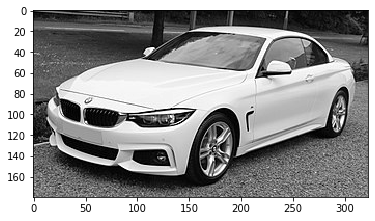

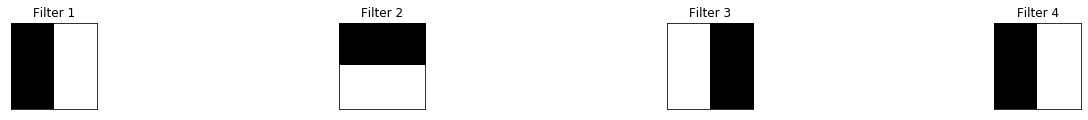

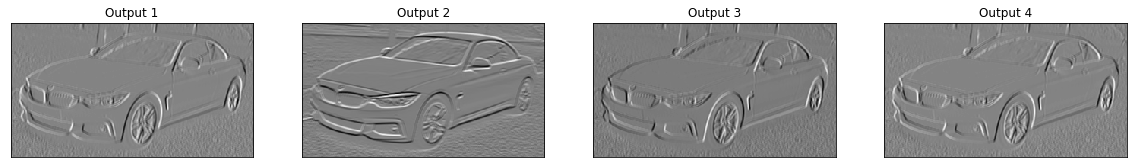

In [0]:
# plot original image
plt.imshow(gray, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor.float())
print(conv_layer)
# visualize the output of a conv layer
viz_layer(conv_layer)

## ** Activation Function
Activation functions are mathematical equations that determine the output of a neural network.
This function helps determines whether the neurons should be activated or not, based on whether each neuron’s input is relevant for the model’s prediction. 
Activation functions can be used to normlize the outputs.
### Types of activation functions :


*   Linear Activation Function
*   **Non-Linear Activation Functions**

### Why Non-Linear Activation Functions is used ?
    - Non-Linear Activation Functions have a derivative,so they allow backpropagation
    - They allow creating a deep neural network. 
### ReLU (Rectified Linear Unit):
<img src="https://drive.google.com/uc?id=192rGF8tZrCeBIK4bXZgUhWdN0zUy9gTW">





tensor([[[[ 53.,  45.,  39.,  ...,   0.,   6.,   0.],
          [ 39.,  40.,  64.,  ...,   0.,   9.,   0.],
          [ 23.,   0.,   3.,  ...,   0.,   0.,   0.],
          ...,
          [107., 153.,   0.,  ...,   0., 128., 293.],
          [161., 239.,  66.,  ...,   0., 205., 274.],
          [133., 119.,  39.,  ...,   0.,  75., 186.]],

         [[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
          [  0.,   0.,   0.,  ...,   2.,   7.,   3.],
          [ 79.,  77.,  75.,  ...,  31.,  24.,  25.],
          ...,
          [  0.,   0.,  79.,  ...,   0.,   0.,  11.],
          [  0.,   0.,   8.,  ...,   0.,   0.,  42.],
          [ 45.,   0.,   0.,  ..., 212., 107.,  80.]],

         [[  0.,   0.,   0.,  ...,  24.,   0.,   4.],
          [  0.,   0.,   0.,  ...,  12.,   0.,   1.],
          [  0.,   7.,   0.,  ...,  25.,   6.,   1.],
          ...,
          [  0.,   0.,  33.,  ..., 266.,   0.,   0.],
          [  0.,   0.,   0.,  ..., 177.,   0.,   0.],
          [  0.,   0.,   0.,  ...

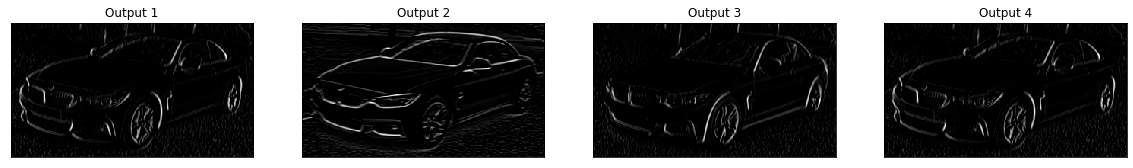

In [0]:
# after a ReLu is applied
print(activated_layer)
viz_layer(activated_layer)

# Why Filters ?

Convolutional neural networks apply a filter to an input to create a feature map that summarizes the presence of detected features in the input

Convolutional neural networks do not learn a single filter; they, in fact, learn multiple features in parallel for a given input.


Building a convential layer:

<img src="https://viewg9jx2ub1l4.udacity-student-workspaces.com/files/notebook_ims/conv_layer.gif" width="50%">

# 2.2- Pooling Layer
Now we have as a result a stack of filtred image and more our images are complex the more filters we have, higher dimensionality means more computing ressourses to use and also can lead to **overfitting**.
To reduce this dimentalinty we use pooling layer, one of the most used pooling layers is :
### **Max-pool :**
<img src="https://austingwalters.com/wp-content/uploads/2019/01/max-pooling.png" width="50%">


In [0]:
#in the forward part
self.pool = nn.MaxPool2d(2, 2)

### Adding max pool layer in our model :

In [0]:
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # defines the convolutional layer, assumes there are 4 grayscale filters
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        self.conv.weight = torch.nn.Parameter(weight)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        convv=self.conv(x)
        #Showing the size of the image after applying the conv layer 
        print("image shape after conv layer",convv.shape)

        conv_x = self.pool(convv)
        #Showing the size of the image after applying the pool layer 
        print("image shape after max pool layer",conv_x.shape)
        activated_x = F.relu(conv_x)
        
        # returns both layers
        return conv_x, activated_x
# instantiate the model and set the weights

weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
print()
model = Net(weight)

# print out the layer in the network
print(model)


torch.Size([4, 4])
tensor([[[[-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.]]],


        [[[-1., -1., -1., -1.],
          [-1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.]]],


        [[[ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.]]],


        [[[-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.]]]])
torch.Size([4, 4])
tensor([[[[-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.],
          [-1., -1.,  1.,  1.]]],


        [[[-1., -1., -1., -1.],
          [-1., -1., -1., -1.],
          [ 1.,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  1.]]],


        [[[ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.],
          [ 1.,  1., -1., -1.]]],


        [[[-1., -1.,  1.,  1.],
       

### As a result :

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
image shape after conv layer torch.Size([1, 4, 177, 320])
image shape after max pool layer torch.Size([1, 4, 88, 160])


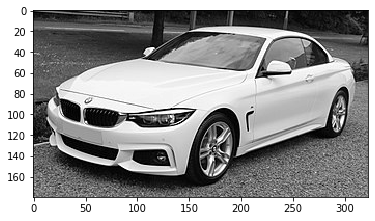

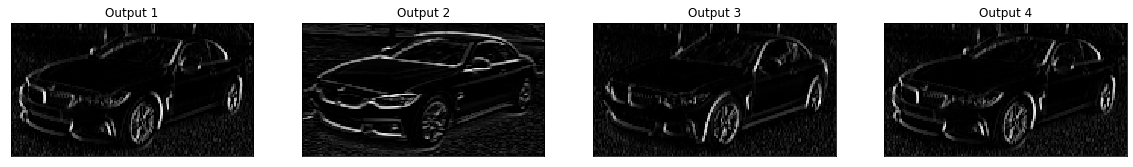

In [0]:

# plot original image
plt.imshow(gray, cmap='gray')


    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor.float())

# visualize the output of a conv layer
viz_layer(activated_layer)

# 2.3- Fully connected Layer
Now that we have converted our input image into a **feature level representaion**, we shall flatten the image into a column vector. The flattened output is fed to a feed-forward neural network and backpropagation applied to every iteration of training.
### Forward propagation :
### Backpropagation and computing gradients:
<img src="https://www.researchgate.net/publication/303744090/figure/fig3/AS:368958596239360@1464977992159/Feedforward-Backpropagation-Neural-Network-architecture.png" width="60%">







### At the end we will get a similar architecture :
<img src="https://adeshpande3.github.io/assets/Cover.png">

#3- Building a quick smile detector using OpenCV
OpenCV (Open Source Computer Vision) is a library of programming functions mainly aimed at real-time computer vision. In simple language it is library used for Image Processing. It is mainly used to do all the operation related to Images.

we are going to be using opencvs pre built "models" to build a smile detector. 
here's the code we are going to be using

In [0]:
import cv2

face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('./haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('./haarcascade_smile.xml')


def detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), ((x + w), (y + h)), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)

        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)
    return frame


video_capture = cv2.VideoCapture(0)
while True:
    # Captures video_capture frame by frame
    _, frame = video_capture.read()

    # To capture image in monochrome
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # calls the detect() function
    canvas = detect(gray, frame)
    # Displays the result on camera feed
    cv2.imshow('Video', canvas)

    # The control breaks once q key is pressed
    if cv2.waitKey(1) & 0xff == ord('q'):
        break

# Release the capture once all the processing is done.
video_capture.release()
cv2.destroyAllWindows()

[Here's a video that explains what's happening behind the scenes](https://youtu.be/hPCTwxF0qf4)

## TO-DO:
load another haarcascade from this github [repo](https://github.com/opencv/opencv/tree/master/data/haarcascades) and try to do something with it.